In [1]:
#Importing necessary packages
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_regression, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
!pip install umap-learn
import umap
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import savefig
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0ac8c6db00eb075b9092e44aa786309f461f9077659917c326981e3f1b4cd4ea
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=10a6bb951c3dd73ebe622924a19317d0843fda5245be9f05f496bfd6afa6ce01
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [2]:
#Allowing Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the file
path = '/content/drive/MyDrive/Colab Notebooks/01. MSiA421/421_Project/'
df = pd.read_csv(path+'data.csv')
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


### Exploratory data analysis

In [4]:
#Shape of df
df.shape

(6819, 96)

There are over 96 features but only 6800+ observations. Due to the overwhelming number of features, we would require more data to build reliable models with all features. Hence, Dimensionality Reduction must be explored.

In [5]:
#Checking data types
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [6]:
#Looking for NAs
(df.isna().sum() == 1).any() #False implies that there are no missing values

False

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
#Checking class imbalance
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
#Checking class imbalance as percentage
df['Bankrupt?'].value_counts(normalize = True)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [22]:
#Checking class imbalance as percentage
pd.DataFrame(df['Bankrupt?'].value_counts(normalize = True)).reset_index()

,index,Bankrupt?
0,0,0.967737
1,1,0.032263


Text(0.5, 1.0, 'Is the company Bankrupt?')

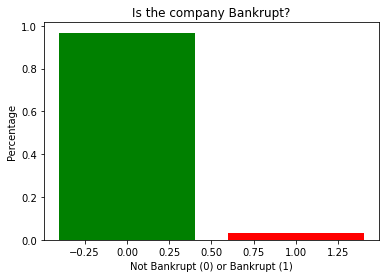

In [39]:
#Plotting the class balance
class_imb = pd.DataFrame(df['Bankrupt?'].value_counts(normalize = True)).reset_index()
class_imb.columns = ['Bankrupt', 'Percentage']
plt.bar(class_imb['Bankrupt'], class_imb['Percentage'], label=class_imb['Bankrupt'], color = ['green','red'])
plt.xlabel('Not Bankrupt (0) or Bankrupt (1)')
plt.ylabel('Percentage')
plt.title('Is the company Bankrupt?')

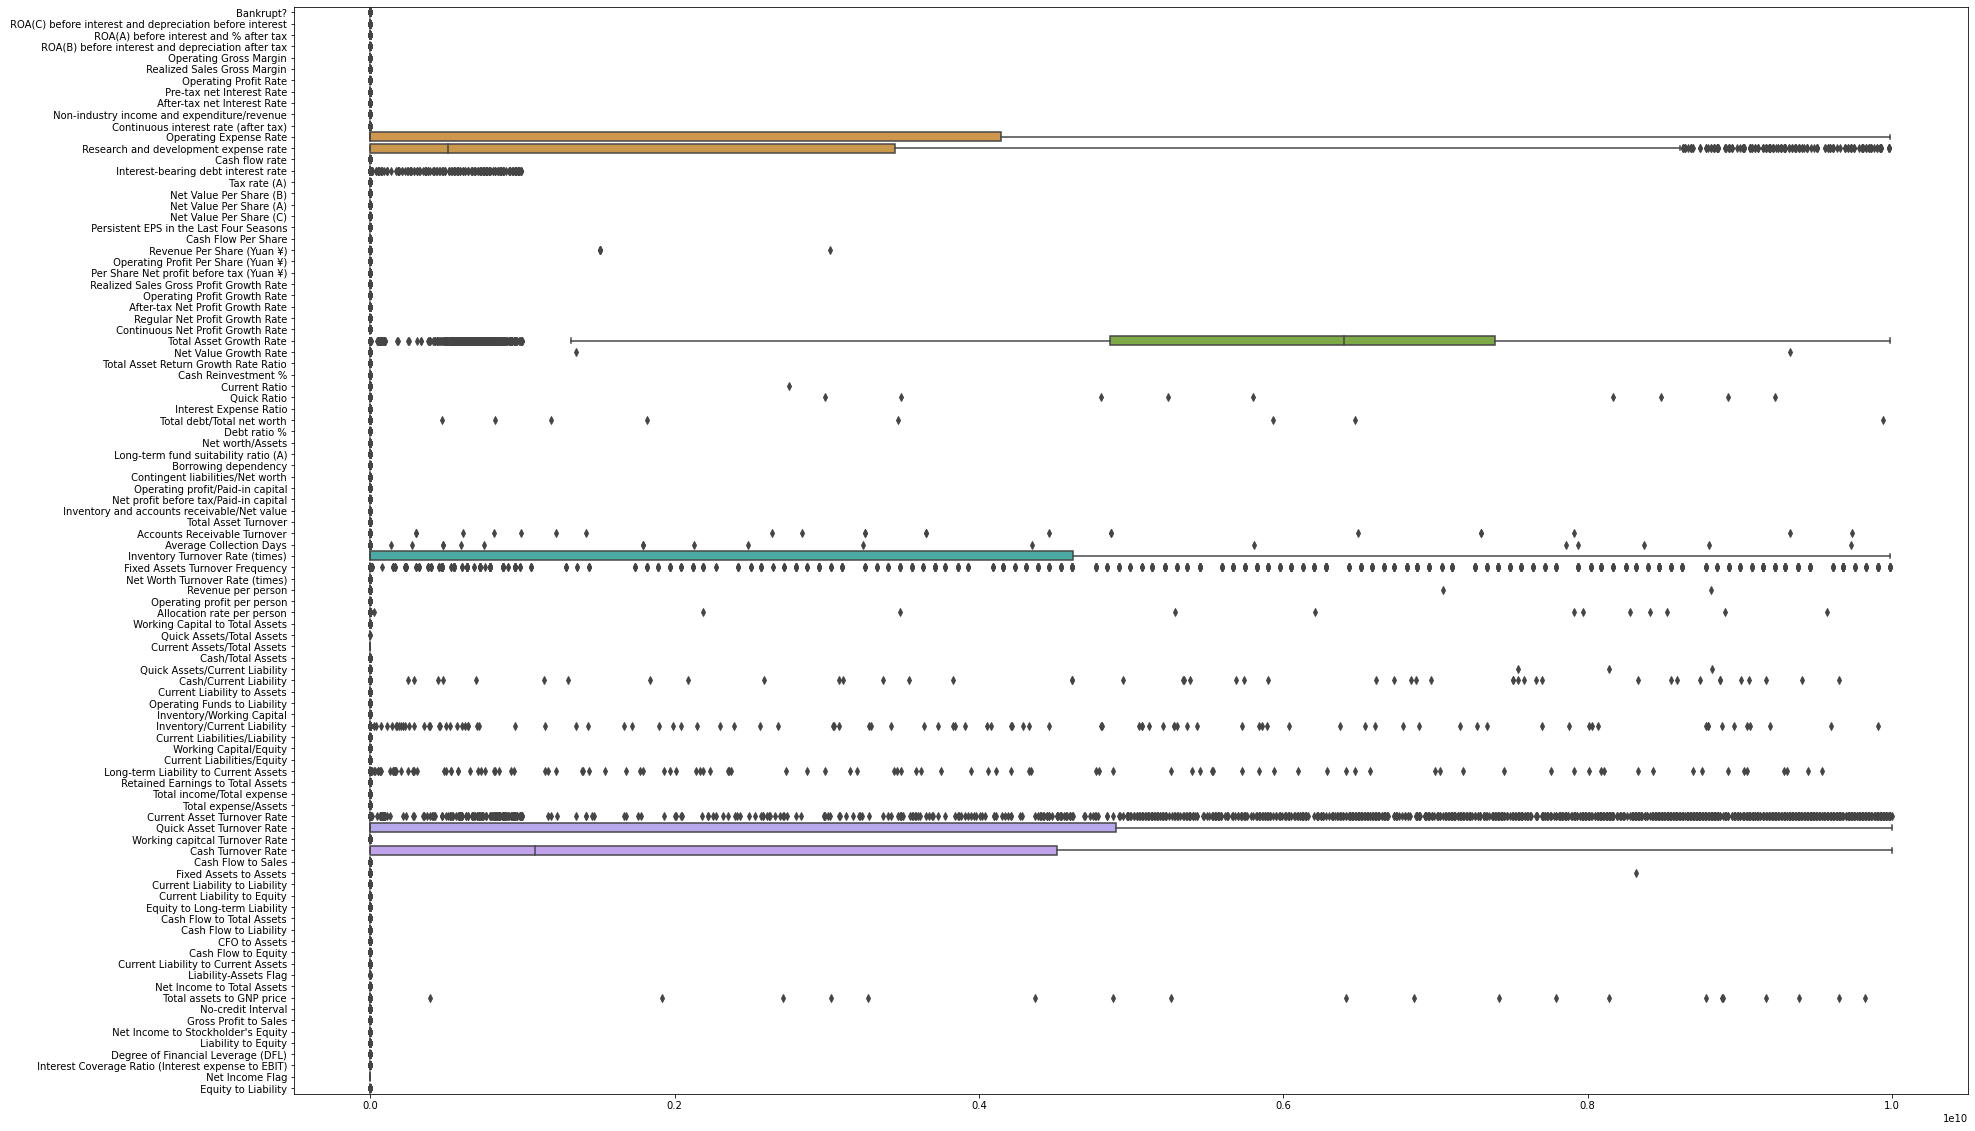

In [41]:
#To find if all variables are in different scales and require scaling
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=df,orient="h")
plt.show()

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Pre-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>],
       [<AxesSubplot:title={'center':' Continuous interest rate (after tax)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubp

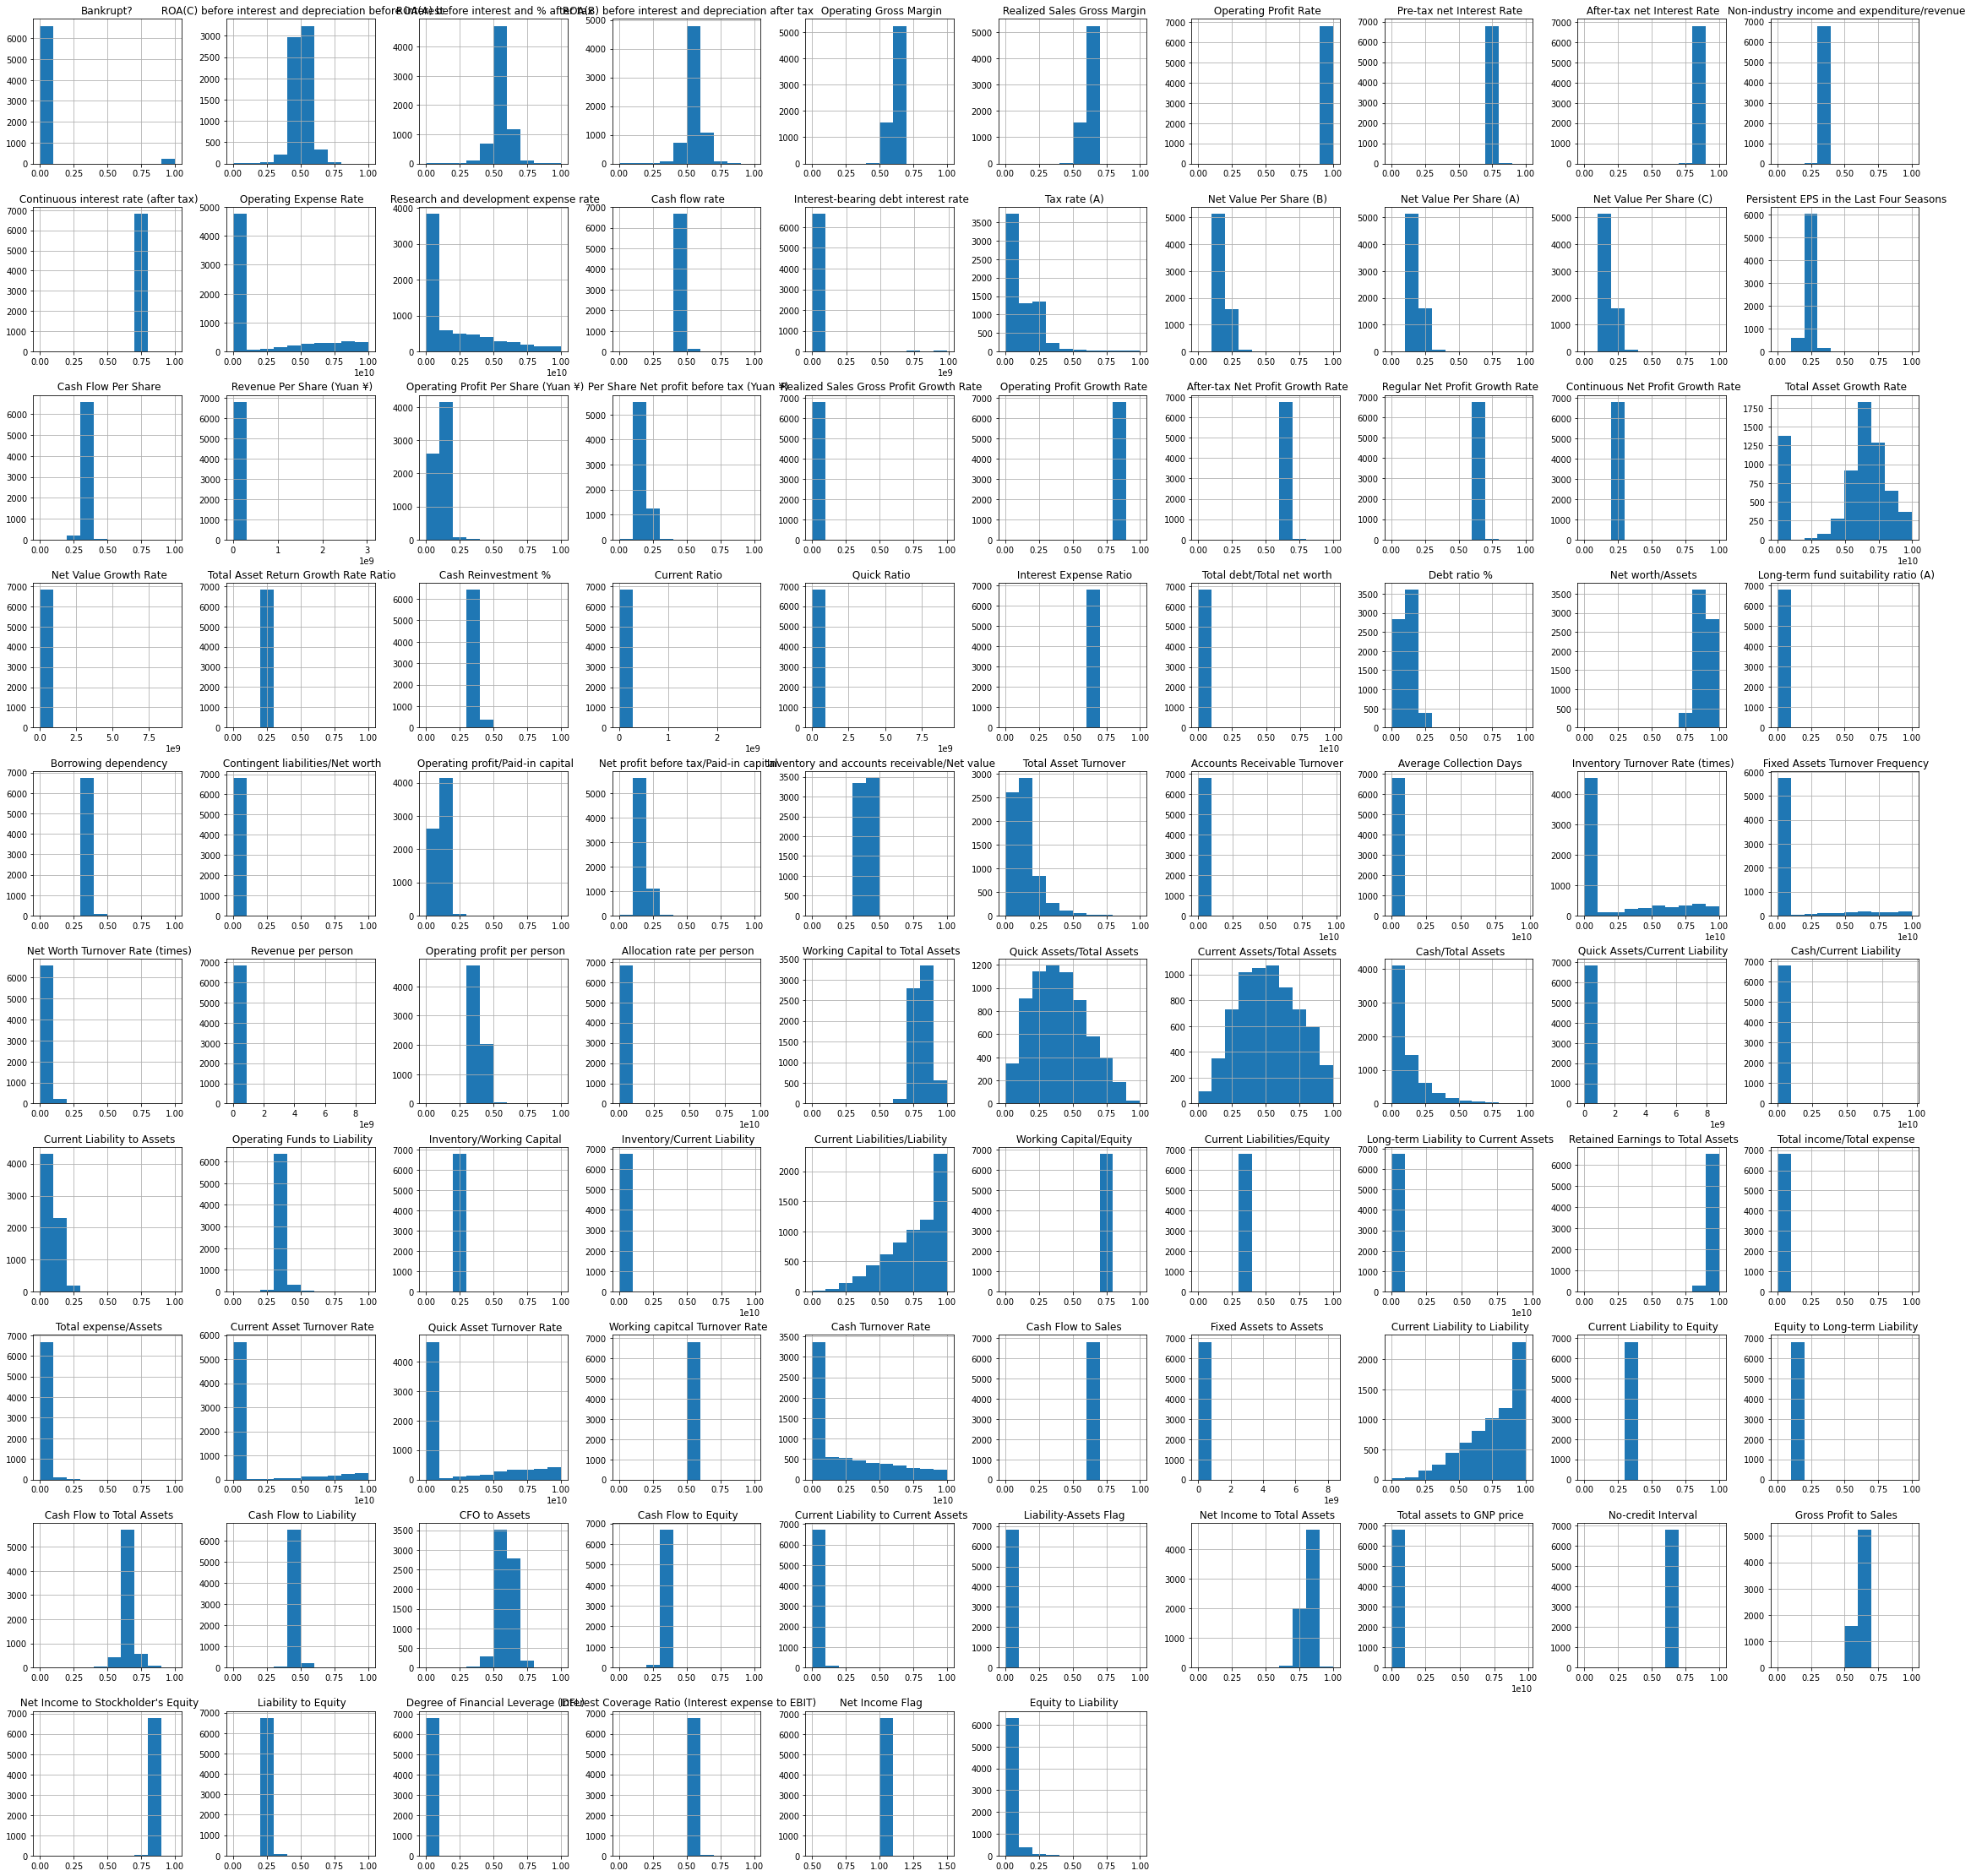

In [40]:
df.hist(figsize = (40,40))

Since the class imbalance is less tha 0.1, we will need data upsampling.

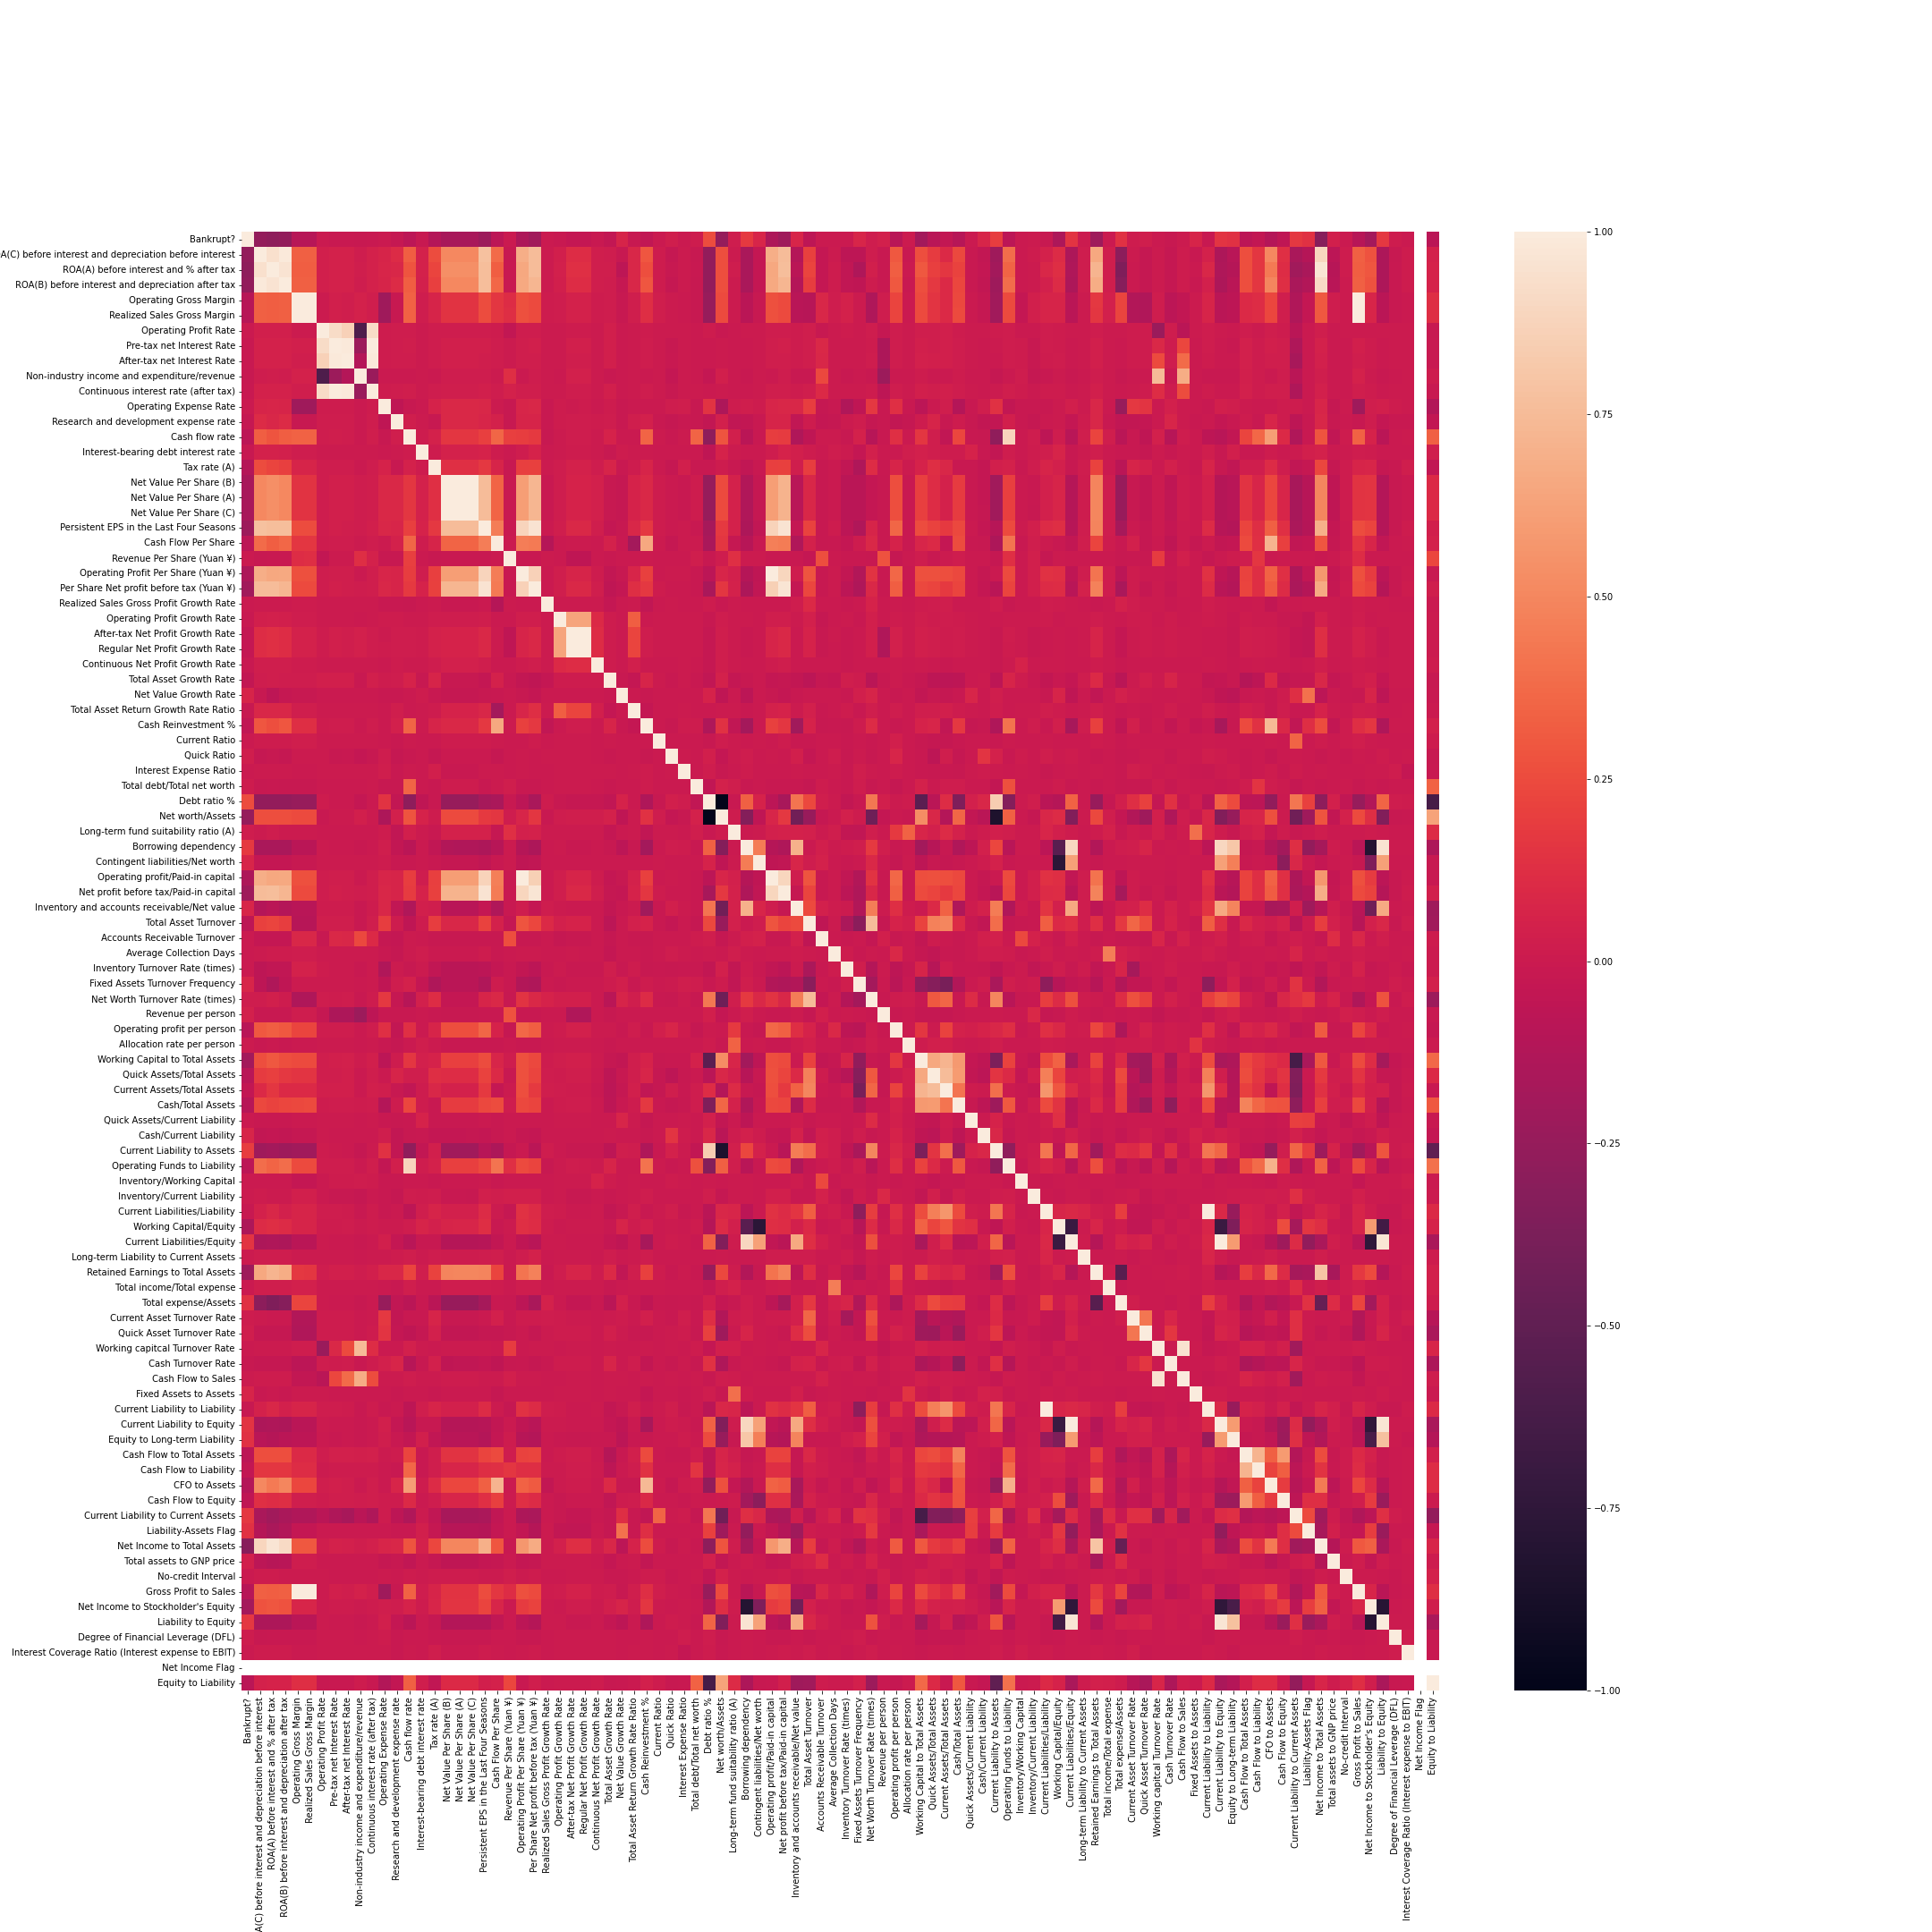

<Figure size 2160x2160 with 0 Axes>

In [16]:
#Creating correlation heatmap
plt.figure(figsize=(30,30))
sns_heatmap = sns.heatmap(df.corr())
sns_heatmap.figure.savefig(path+"heatmap.png")

plt.clf() # Clean heatmap figure from sns 
Image(filename=path + 'heatmap.png') # Show heatmap as image

### To print to HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/EDA_v1.ipynb

[NbConvertApp] Converting notebook /content/EDA_v1.ipynb to html
[NbConvertApp] Writing 376758 bytes to /content/EDA_v1.html
